# Homework 2


## Linear Time Iteration

A deterministic one-dimensional linear model for inflation is written in the form:

$$\pi_{t+1} - (\lambda_1 + \lambda_2) \pi_t + \lambda_1 \lambda_2 \pi_{t-1}$$

with $0<\lambda_1<\lambda_2$
Here, inflation is backward looking in the sense that inflation $\pi_t$ will depend on past inflation $\pi_{t-1}$.
The solution takes the form $\forall t, \space \pi_t = \lambda \pi_{t-1}$ where $\lambda$ is a constant to be determined.

1. __(Theory) Write down the second order equation $P(\lambda)=0$, which characterizes $\lambda$. What are the roots of polynomial $P$ ?__
    

I will assume that the equation is:
$$\pi_{t+1} - (\lambda_1 + \lambda_2) \pi_t + \lambda_1 \lambda_2 \pi_{t-1} = 0$$

This leads to the following equation :

$$ P(\lambda) = \lambda^2 - (\lambda_1+\lambda_2)\lambda + \lambda_1 * \lambda_2 = 0 $$

The roots of the polynomial P are $\lambda_1$ and $\lambda_2$.


2. __(Theory 2) Justify that $T(x) = \frac{-\lambda_1\lambda_2}{x-\lambda_1-\lambda_2}$ is the time iteration operator. Show that it admits two fixed points, but that only one of them is stable by computing $|T^{\prime}|$.__

2.1. Let's check that $T(x) = \frac{-\lambda_1\lambda_2}{x-\lambda_1-\lambda_2}$.

The solution is of the form : $\pi_{t+1} = \lambda \pi_{t}$. Therefore, by replacing $\pi_{t+1}$ in the main equation : 

$$\lambda \pi_{t} - (\lambda_1 + \lambda_2) \pi_t + \lambda_1 \lambda_2 \pi_{t-1} = 0$$

which gives:

$$(\lambda - \lambda_1 -\lambda_2) \pi_t = - \lambda_1 \lambda_2 \pi_{t-1} $$

Thus :

$$ \pi_t = - \frac{\lambda_1 \lambda_2}{\lambda - \lambda_1 -\lambda_2} \pi_{t-1} $$

Finally: $T(x) = \frac{-\lambda_1\lambda_2}{x-\lambda_1-\lambda_2}$

2.2. Now, let's find potential fixed points. We have that :

$$ x = \frac{\lambda_1 \lambda_2}{x-\lambda_1 -\lambda_2} $$

$$ \iff  x^2 - (\lambda_1 + \lambda_2)x = -\lambda_1 \lambda_2 $$

So, again: $x = \lambda_1$ or $\lambda_2$.

Furthermore, we have $T'(x) = \frac{\lambda_1 \lambda_2}{(x-\lambda_1 - \lambda_2)^2} > 0$ and $T'(\lambda_1) = \frac{\lambda_1}{\lambda_2} < 1$ whereas $T'(\lambda_2) = \frac{\lambda_2}{\lambda_1} > 1$. Thus, $\lambda_1$ is stable but not $\lambda_2$.

It is actually possible (and easy) to show that the series $(x_n)$ defined recursively by $x_n = T(x_{n-1})$ converges to $\lambda_1$ starting from any initial point $x_0$, except from $\lambda_2$. This method of computing a solution is called *linear time iteration*.

3. __Implement the linear time iteration and illustrate its convergence graphically by plotting its progress,  starting from various levels of $x_0$. Show one case with $\lambda_1<\lambda_2<1$, one with $\lambda_1<1<\lambda_2$ and one with $1<\lambda_1<\lambda_2$.__

In [1]:
using Plots

In [2]:
function T(x::Float64, λ1::Float64, λ2::Float64)
    return -λ1 * λ2 / (x - λ1 - λ2)
end

function plot_n_iterations(n_it::Int64, x0::Float64, λ1::Float64, λ2::Float64)
    n = [k for k in 1:n_it]
    x = [x0]
    for i in 1:n_it-1
        x0 = T(x0, λ1, λ2)
        append!(x,x0)
    end
    plot(n,x, ylab="x", xlab = "iterations", lab="λ1 = $(λ1) and λ2 = $(λ2)")
end

plot_n_iterations (generic function with 1 method)

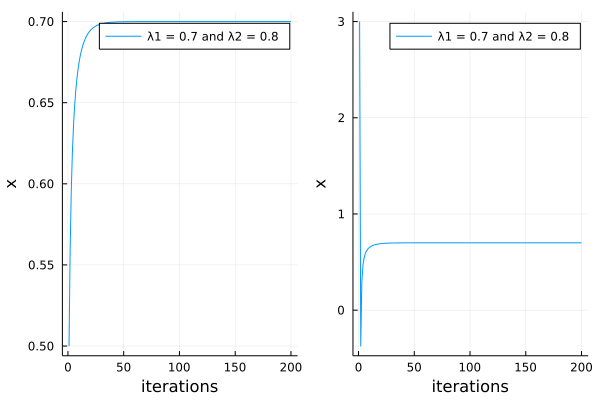

In [3]:
p1 = plot_n_iterations(200, 0.5, 0.7, 0.8)
p2 = plot_n_iterations(200, 3., 0.7, 0.8)
plot(p1, p2, layout=(1,2))

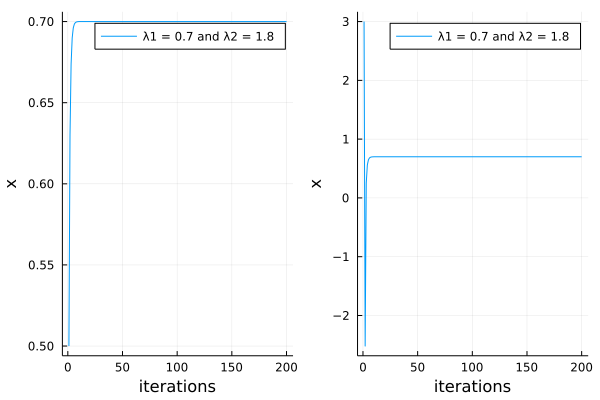

In [4]:
p1 = plot_n_iterations(200, 0.5, 0.7, 1.8)
p2 = plot_n_iterations(200, 3., 0.7, 1.8)
plot(p1, p2, layout=(1,2))

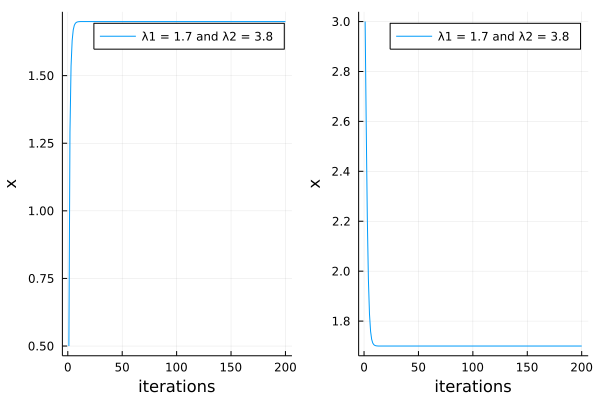

In [5]:
p1 = plot_n_iterations(200, 0.5, 1.7, 3.8)
p2 = plot_n_iterations(200, 3., 1.7, 3.8)
plot(p1, p2, layout=(1,2))

4. __A model is well specified if it admits a unique non-diverging solution. What method would you propose to check that the solution obtained by linear time-iteration is convergent and unique?__

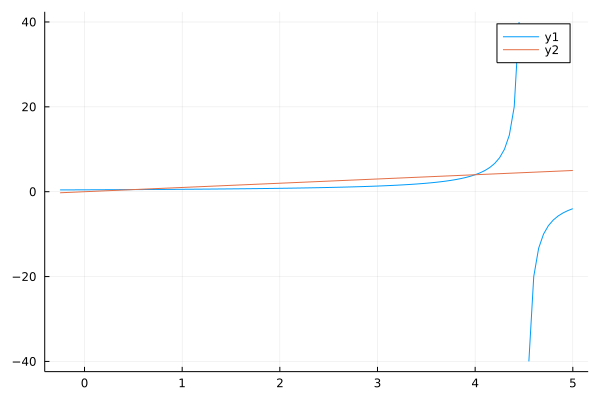

In [6]:
plot([-5:100]/20,[T(x/20.,0.5, 4.) for x in -5:100])
plot!([-5:100]/20, [-5:100]/20)

I think that the best way to do it is theoretically. 

- Let's consider $x_t < \lambda_1$. Whe showed earlier that $T'>0$ but we have also that $T'$ is not defined in $\lambda_1 + \lambda_2$, that $lim_{_\infty}T(x) = 0 $ and that $lim_{(\lambda_1 + \lambda_2)_{-}}T(x) = +\infty $. Since $x_t < \lambda_1$, we have that $T(x_t) - x >0 $, thus $\lambda_1 \geq x_t+1 > x_t$.
- Let's now consider $\lambda_2 > x_t > \lambda_1$ : here $T(x_t)<x_t$ implying that $\lambda_1 \leq x_{t+1} < x_t$.
- Now if $ \lambda_2 < x_t < \lambda_1 + \lambda_2$, $T(x_t) > x_t$. Thus, $x_{t+1} > x_t$. This increases strictly at any step and cannot converge since we have not a fixed point above. At some point, we have $x_n > \lambda_1+\lambda_2$ which is the next bullet.
- If $x_t > \lambda_1+\lambda_2$: $T$ is strictly increasing from $-\infty$ to $0$. Thus $x_{t+1}<0$ and we arrive at the first bullet.

5. __(Bonus) Implement an *improved* linear time iteration algorithm, that is a Newton descent applied to $x-T(x)$ and discuss its convergence.__

In [7]:
function dT_dx(x, λ1, λ2)
    return (λ1 * λ2) / (x-λ1-λ2)^2
end

function step(x, λ1, λ2)
    return (T(x,λ1,λ2)-x)/(1-dT_dx(x, λ1, λ2)) + x 
end

function plot_n_iterations_improved(n_it::Int64, x0::Float64, λ1::Float64, λ2::Float64)
    n = [k for k in 1:n_it]
    x = [x0]
    for i in 1:n_it-1
        x0 = step(x0, λ1, λ2)
        append!(x,x0)
    end
    plot(n,x, ylab="x", xlab = "iterations", lab="λ1 = $(λ1) and λ2 = $(λ2)")
end

plot_n_iterations_improved (generic function with 1 method)

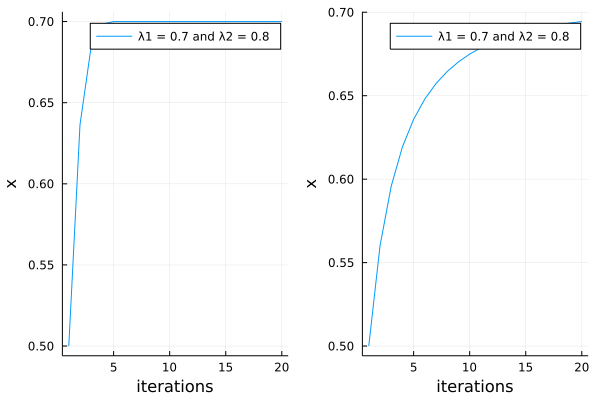

In [8]:
p1 = plot_n_iterations_improved(20, 0.5, 0.7, 0.8)
p2 = plot_n_iterations(20, 0.5, 0.7, 0.8)
plot(p1, p2, layout=(1,2))

## Dividend Pricing

A dividend process is described by $d_t=\exp(\epsilon) (d_{t-1})^\rho$ with $\rho=0.9$ and $\epsilon$ a normal i.i.d. process with mean 0 and standard deviation 0.05.
Given discount rate $\beta=0.95$ our ultimate goal is to evaluate the risk neutral price of a right to the dividend, which satisfies:

$$p_t=d_t + \beta E_t \left[ p_{t+1} \right]$$

In functional form, we look for a function $p()$ such that

$$\forall d, \color{yellow}{p}(d)=d+\beta E_{\epsilon} \left[ \color{red}{p}\left( \exp(\epsilon) (d)^\rho \right)\right]$$

The general algorithm, will consist in updating the price function on the left as a function of the price function on the right. It raises two challenges:
- integrate the term within the square brackets (we'll use quadrature)
- interpolate the price function so that it can be evaluated at any realisation of $\exp(\epsilon) (d)^\rho$

1. __Integration: discretize random shock $\epsilon_t$ with $K=5$ nodes and weights $(w_i, \epsilon_i)$ by using a gauss-hermite quadrature.
As an example, use this discretization to evaluate $\mathbb{E}\left(\epsilon^2\right)$ and $\mathbb{E}\left[ \exp(\epsilon)\right]$.__

In [9]:
using FastGaussQuadrature
ϵ, w = gausshermite( 5 );

ϵ = ϵ.*0.05*sqrt(2) # renormalize nodes

s1 = sum( w_*x_^2 for (w_,x_) in zip(w,ϵ))
s2 = sum( w_*exp(x_) for (w_,x_) in zip(w,ϵ))

s1 /= sqrt(π) # renormalize output
s2 /= sqrt(π)

print("s1=",s1," and s2=",s2)

s1=0.0025000000000000022 and s2=1.0012507815756224

2. __Interpolation: for $N=20$, propose a regular grid $(d_1, ... d_N)$ for $d$ that is large enough to contain a large fraction of of the realizations of $d_t$. A function $p()$ will be identified with an $N$-components vector `p`$=(p_1, ..., p_N)=(p(d_1), ..., p(d_N))$ and linear interpolation will be used to evaluate `p` outside of the grid points (you can use library `interpolations.jl`) . Choose an initial guess for $p()$, for instance $p(d)=d^2$ and plot the interpolated function.__

<mark>Hint</mark>: given a vector of points `x` and matching vector of values `y`, you can use `itp = LinearInterpolation(x, y, extrapolation_bc = Line())` to construct a smooth function, which equals `y` on `x`. You can then interpolate at any point or vector of points `z` with `itp(z)`.


First, I will get an idea of the values taken by d.

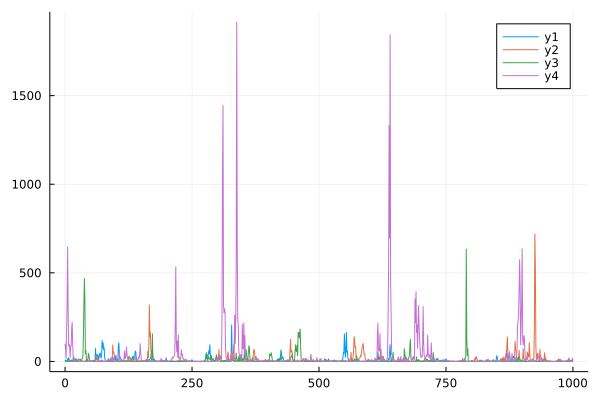

In [10]:
function evolution(d0)
    d=[d0]
    test_ϵ = randn(1000)
    for k in 1:1000
        d0 = exp(test_ϵ[k])*d0^0.9
        append!(d,d0)
    end
    return d
end
p1 = plot([i for i in 0:1000],evolution(1.))
plot!([i for i in 0:1000],evolution(0.1))
plot!([i for i in 0:1000],evolution(10.))
plot!([i for i in 0:1000],evolution(100.))
p1

Now let's answer the question :

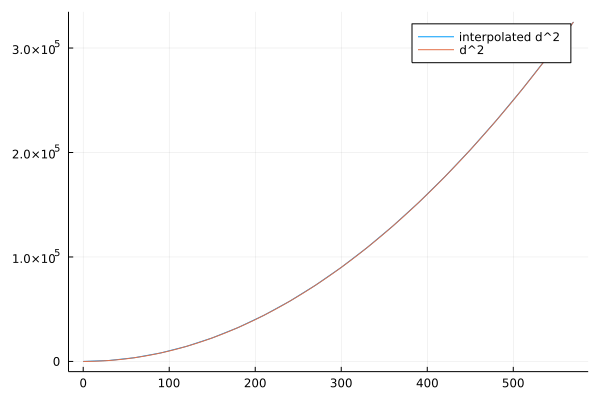

In [11]:
using StaticArrays
using Interpolations
d_grid = 0:30:570
f(d) = d^2
p = [f(d) for d in d_grid]
# linear interpolation
interp_linear = LinearInterpolation(d_grid, p, extrapolation_bc = Line())
plot([k for k in 0:570], interp_linear.([k for k in 0:570]), lab="interpolated d^2")
plot!([k for k in 0:570],[k for k in 0:570].^2, lab="d^2")

3. __Assuming vector `p0` represents the $p()$ function on the right, compute `p1` vector which represents the $p()$ function on the left. Call `T()` the function which map `p0` to `p1`.__

In [12]:
function T(p0)
    interp_linear = LinearInterpolation(d_grid, p0, extrapolation_bc = Line())
    
    ϵ, w = gausshermite( 5 );
    ϵ = ϵ.*0.05*sqrt(2) # renormalize nodes
    s = sum( w_ .*  interp_linear.(exp(x_) .* d_grid .^ 0.9) for (w_,x_) in zip(w,ϵ))
    s /= sqrt(π) # renormalize output

    p1 = d_grid .+ 0.95 .* s
    return  p1
end

T (generic function with 2 methods)

4. __Find the equilibrium price `p` by iterating on `T()`. Plot.__

In [13]:
d_grid = 0:30:570

f(d) = d^2
p0 = [f(d) for d in d_grid]

p1 = T(p0)

n_it = 1
while n_it<100 && maximum(abs.(p1-p0)) >1e-5
    p0 = p1
    p1 = T(p0)
    n_it += 1
end
print("gap=",maximum(abs.(p1-p0))," and n_it=", n_it)

gap=9.228801673089038e-6 and n_it=50

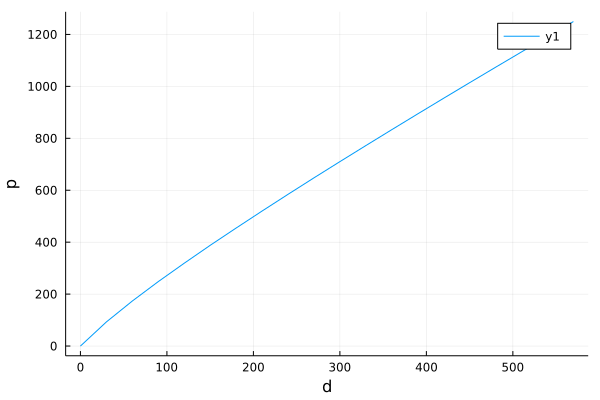

In [14]:
plot(d_grid,p1, ylab="p", xlab="d")

5. __Bonus: justify why the function `T(p)` is actually linear in `p`. Use `IterativeSolver.jl` to solve directly the equation `p=T(p)` (check the doc...). Compare results and number of iterations with the precendent function.__

In [16]:
using IterativeSolvers

## Brock-Mirman Stochastic Growth model

Here is a neoclassical growth model with unpredictable shocks on productivity.

Social planner tries to solve:

$$\max E_t \left[ \sum_{n=0}^{\infty} \beta^n \log C_{t+n} \right]$$

s.t.

$$K_{t+1} = Y_t - C_t$$
$$Y_{t+1} = A_{t+1}K_{t+1}^\alpha$$

where $A_t$ is the level of productivity in period $t$. 
It can take  values $A^h=1.05$ and $A^l=0.95$. The transition between these two states are given by the matrix:
$$P = \begin{bmatrix}
0.9, 0.1\\
0.1, 0.9
\end{bmatrix}$$

We want to solve this problem by converting it into a discrete dynamic programming problem.

__1. Propose a plausible calibration__

As usual, we will take : $\beta = 0.96$ and $\alpha = 0.4$.

__2. What are the states? What are the controls? Is it possible to bound them in a natural way? Propose a discretization scheme for:__
- __the states (a vector of values)__
- __the controls (for each state, a vector of possible values)__
- __the transitions (a deterministic function which computes the next state as a function of current state and control)__

- State : $Y \in \mathcal K$
- control : $C(Y)$
- transition :
we have that :
$$ Y_{t+1} = A_{t+1}(Y_t  - C_t)^\alpha $$
So, the transition function is defined by:
$$ f : (s_t,x_t) \mapsto a_{t+1} (s_t-x_t) ^\alpha $$



__3. Write down the Bellman equation__

$$V(Y) = max_{C(Y)} log C(Y) + \beta \sum_{Y' \in \mathcal Y }\Pi(Y'|Y, C(Y))V(Y')$$

ie. : 

$$V(Y) = max_{C(Y)} log C(Y) + \beta (A*0.8+0.2) * V(A(Y - C(Y))^\alpha) $$

__4. How do you represent a policy function? Implement a value evaluation function.__

A policy function can be represented on a graph of the control as a function of the states.

In [21]:
using LinearAlgebra, Statistics
using Plots, QuantEcon, Interpolations, NLsolve, Optim, Random, Parameters
using Optim: maximum, maximizer

In [22]:
function T(w;p, tol = 1e-10)
    @unpack β, u, f, A, y = p # unpack parameters
    w_func = LinearInterpolation(y, w)

    Tw = similar(w)
    σ = similar(w)
    for (i, y_val) in enumerate(y)
        # solve maximization for each point in y, using y itself as initial condition.
        results = maximize(c -> u(c;p) + β * mean(w_func.(f(y_val - c;p) .* A)), tol, y_val)
        Tw[i] = maximum(results)
        σ[i] = maximizer(results)
    end
    return (;w = Tw, σ) # returns named tuple of results
end

Random.seed!(42) # for reproducible results
u(c;p) = log(c) # utility
f(k;p) = k^p.α # deterministic part of production function
mc = MarkovChain([0.9 0.1; 0.1 0.9], [0.95, 1.05])

OptimalGrowthModel = @with_kw (α = 0.4, β = 0.96, mc=mc,
                  u = u, f = f, # defaults defined above
                  y = range(1e-5, 4.0, length = 200), # grid on y
                  A = simulate(mc, 200, init = 1) # monte carlo shocks
) # named tuples defaults

##NamedTuple_kw#270 (generic function with 2 methods)

__5. Solve the model using Value Function Iteration. Plot the solution.__

First, let's find the optimal value function.

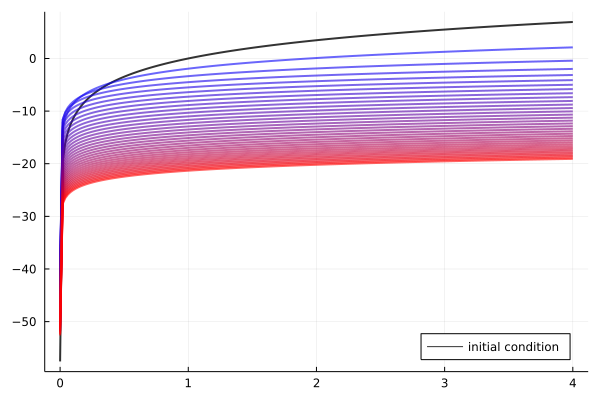

In [23]:
p = OptimalGrowthModel() # use all default parameters from named tuple

w = 5 * log.(p.y)  # An initial condition -- fairly arbitrary
n = 35 #nb simulations

plot(xlim = (extrema(p.y)), ylim = (-50, 10))
lb = "initial condition"
plt = plot(p.y, w, color = :black, linewidth = 2, alpha = 0.8, label = lb)
for i in 1:n
    w = T(w; p).w # value iteration step
    plot!(p.y, w, color = RGBA(i/n, 0, 1 - i/n, 0.8), linewidth = 2, alpha = 0.6,
          label = "")
end

plot!(plt, legend = :bottomright)

Above we could see that the convergence was quite fast and that at the 35 steps we were rather close of the solution. Now, we can plot only an approximation of the value function:

Converged in 25 to an ||residuals||_∞ of 1.927254800193623e-9


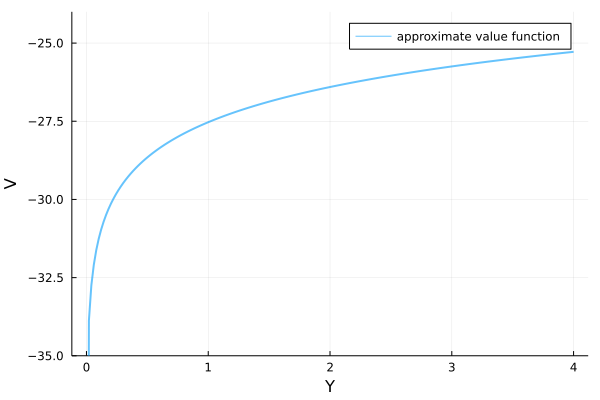

In [26]:
function solve_optgrowth(initial_w; p, iterations = 500, m = 3, show_trace = false) 
    results = fixedpoint(w -> T(w;p).w, initial_w; iterations, m, show_trace) # Anderson iteration
    v_star = results.zero
    σ = T(results.zero;p).σ
    return (;v_star, σ, results)
end

initial_w = 5 * log.(p.y)
sol = solve_optgrowth(initial_w;p)
v_star_approx = sol.v_star
println("Converged in $(sol.results.iterations) to an ||residuals||_∞ of $(sol.results.residual_norm)")

plt = plot(ylim = (-35, -24))
plot!(plt, p.y, v_star_approx, linewidth = 2, alpha = 0.6,
      label = "approximate value function", ylabel = "V", xlabel = "Y")

Now, we can get an approximation of the optimal policy function :

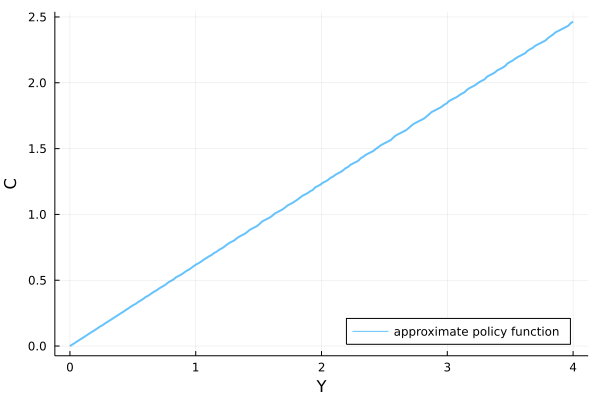

In [28]:
plt = plot(p.y, T(v_star_approx; p).σ, lw=2, alpha=0.6, label = "approximate policy function", ylabel = "C", xlabel = "Y")
plot!(plt, legend = :bottomright)

__6. Implement Policy Improvement Steps. Compare convergence Speed.__

In [31]:
using Roots, Optim, BenchmarkTools

In [52]:
function K!(Kg, g, grid, β, ∂u∂c, f, ∂f∂k, shocks)
# This function requires the container of the output value as argument Kg

    # Construct linear interpolation object
    g_func = LinearInterpolation(grid, g, extrapolation_bc=Line())

    # solve for updated consumption value
    for (i, y) in enumerate(grid)
        function h(c)
            vals = ∂u∂c.(g_func.(f(y - c) * shocks)) .* ∂f∂k(y - c) .* shocks
            return ∂u∂c(c) - β * mean(vals)
        end
        Kg[i] = find_zero(h, (1e-10, y - 1e-10))
    end
    return Kg
end

# The following function does NOT require the container of the output value as argument
K(g, grid, β, ∂u∂c, f, ∂f∂k, shocks) =
    K!(similar(g), g, grid, β, ∂u∂c, f, ∂f∂k, shocks)

K (generic function with 1 method)

In [55]:
mc = MarkovChain([0.9 0.1; 0.1 0.9], [0.95, 1.05])

OptimalGrowthModel2 = @with_kw (α = 0.4, β = 0.96, mc=mc,
                  u = c -> log(c), f = k -> k^0.4, # defaults defined above
                  y = range(1e-5, 4.0, length = 200), # grid on y
                  A = simulate(mc, 200, init = 1),
                  ∂u∂c = c -> 1/c,
                  ∂f∂k = k -> 0.4*k^-0.6
) # named tuples defaults

m = OptimalGrowthModel2()

(α = 0.4, β = 0.96, mc = Discrete Markov Chain
stochastic matrix of type Matrix{Float64}:
[0.9 0.1; 0.1 0.9], u = var"#61#69"(), f = var"#62#70"(), y = 1.0e-5:0.020100452261306533:4.0, A = [0.95, 0.95, 0.95, 0.95, 1.05, 1.05, 1.05, 1.05, 1.05, 1.05  …  0.95, 1.05, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95], ∂u∂c = var"#63#71"(), ∂f∂k = var"#64#72"())

In [64]:
function check_convergence(m, g_init; n_iter = 15)
    @unpack y, β, A, ∂u∂c, f, ∂f∂k = m
    g = g_init;
    plot(y, g, lw = 2, alpha = 0.6, label = "intial condition c(y) = y")
    for i in 1:n_iter
        new_g = K(g, y, β, ∂u∂c, f, ∂f∂k, A)
        g = new_g
        plot!(y, g, lw = 2, alpha = 0.6, label = "", ylabel = "c", xlabel="y")
    end
    plot!(legend = :topleft)
end

check_convergence (generic function with 1 method)

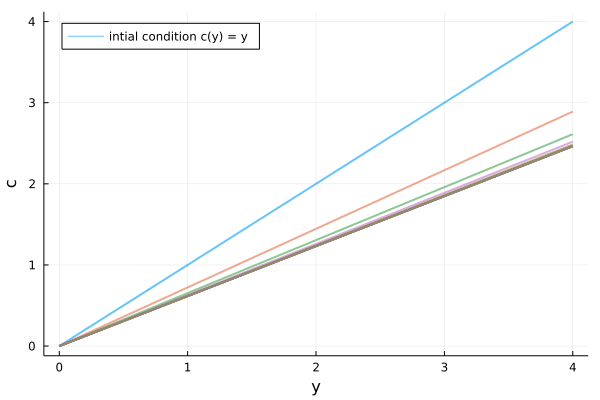

In [65]:
check_convergence(m, m.y, n_iter = 15)

It converges faster than the previous method towards the policy function.

__Bonus: Propose some ideas to improve performances.__